In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error

In [7]:
test = pd.read_csv('test.csv')
mine = pd.read_csv('submission.csv')
public = pd.read_csv('submission-public.csv')

In [8]:
public['building_id'] = mine['building_id'] = test.building_id
public['meter'] = mine['meter'] = test.meter

In [9]:
id_meter_pair = test.loc[:, ['building_id', 'meter']].drop_duplicates().sort_values(['building_id', 'meter']).reset_index(drop=True)

In [10]:
def plot(building_id, meter):
    where = public.building_id == building_id
    where &= public.meter == meter
    y_true = public.loc[where, 'meter_reading']
    
    where = mine.building_id == building_id
    where &= mine.meter == meter
    y_pred = mine.loc[where, 'meter_reading']
    
    plt.figure(figsize=[300, 10])    
    plt.plot(y_true.values)
    plt.plot(y_pred.values)
    plt.show()

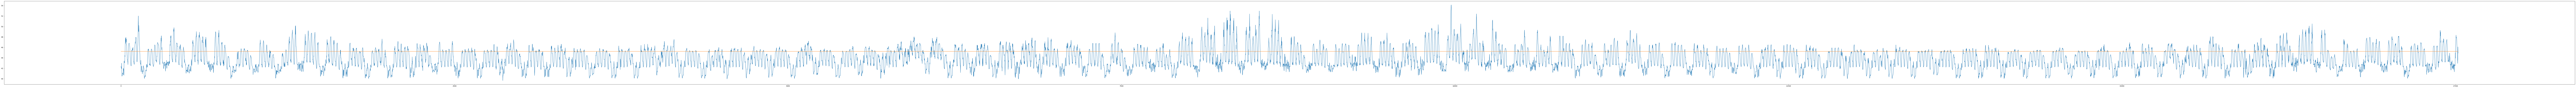

In [11]:
plot(651, 0)

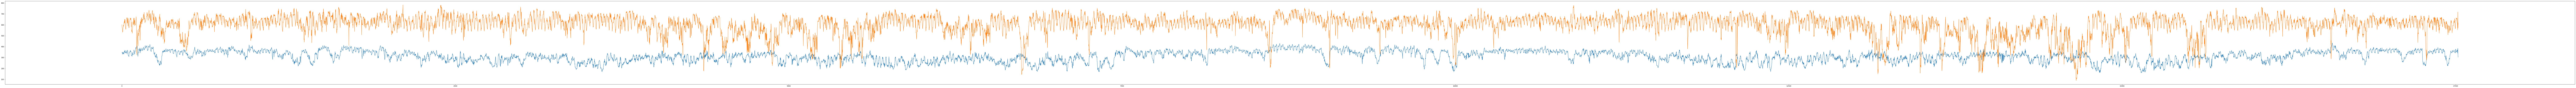

In [6]:
plot(1250, 0)

In [59]:
for idx, (building_id, meter) in id_meter_pair.iterrows():
    
    where = public.building_id == building_id
    where &= public.meter == meter
    y_true = public.loc[where, 'meter_reading']
    
    where = mine.building_id == building_id
    where &= mine.meter == meter
    y_pred = mine.loc[where, 'meter_reading']
    
    id_meter_pair.loc[idx, 'error'] = mean_squared_log_error(y_true, y_pred)

ValueError: too many values to unpack (expected 2)

In [ ]:
id_meter_pair.sort_values('error', ascending=False, inplace=True)
id_meter_pair

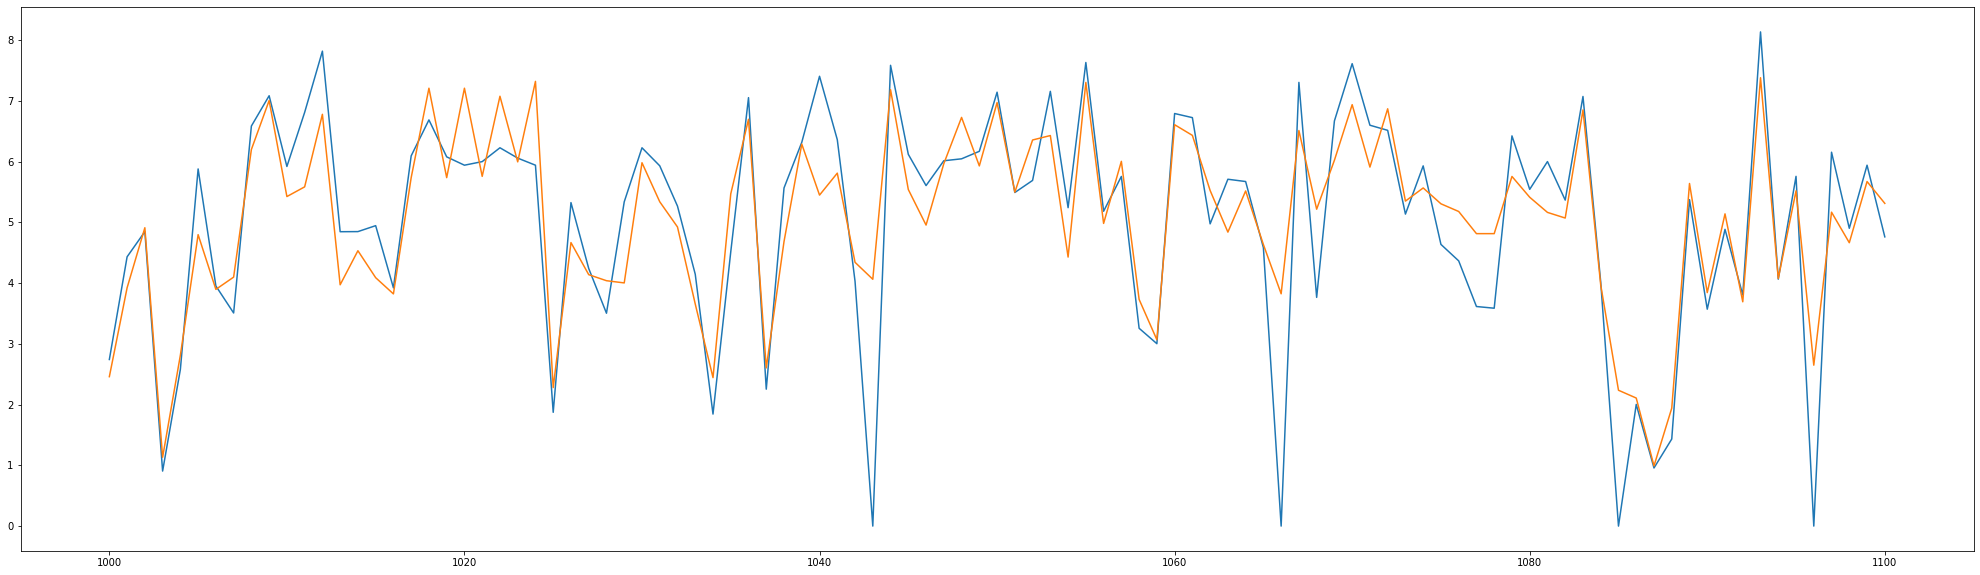

In [14]:
plt.figure(figsize=[35, 10])
plt.plot(np.log1p(public.loc[1e3:1e3+1e2, 'meter_reading']))
plt.plot(np.log1p(mine.loc[1e3:1e3+1e2, 'meter_reading']))